<a href="https://colab.research.google.com/github/ayeshayaseen728-cmyk/Ayesha/blob/main/mnist_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
from matplotlib import pyplot as pyplot
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

In [ ]:
# we are using mnist dataset
(Xtrain, Ytrain) , (Xtest,Ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


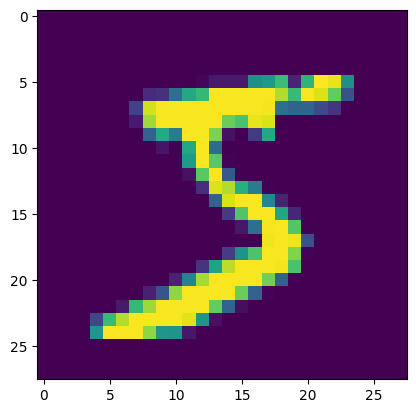

In [ ]:
plt.imshow(Xtrain[0])
plt.show()

In [ ]:
Xtrain = Xtrain.reshape(Xtrain.shape[0],28,28,1)
Xtest = Xtest.reshape (Xtest.shape[0],28,28,1)

In [ ]:
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [ ]:
Xtrain /= 255
Xtest /=  255

In [ ]:
print(Ytrain[0])

5


In [ ]:
from tensorflow.keras.utils import to_categorical
Ytrain =to_categorical(Ytrain,10)
Ytest = to_categorical(Ytest,10)

In [ ]:
print(Ytrain[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Model for image calssification

model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape =(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,482 (240.16 KB)

 Trainable params: 61,482 (240.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(Xtrain,Ytrain, batch_size=1024, epochs=1, verbose=1)

59/59 ━━━━━━━━━━━━━━━━━━━━ 33s 560ms/step - accuracy: 0.9045 - loss: 0.3247


In [ ]:
!nvidia_smi

/bin/bash: line 1: nvidia_smi: command not found


In [ ]:
pred = model.predict(Xtest[np.newaxis,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [ ]:
pred

array([[3.2424103e-04, 3.8177028e-04, 9.9005413e-01, 3.8536130e-03,
        1.0915949e-07, 6.9400856e-05, 5.2072913e-03, 3.1455489e-09,
        1.0934074e-04, 6.9991309e-08]], dtype=float32)

In [ ]:
Predication = pred.argmax(axis=1)

In [ ]:
Predication

array([2])

2


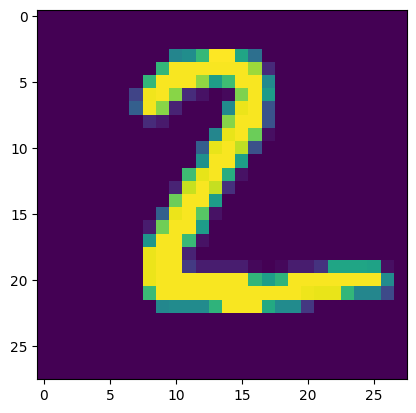

In [ ]:
print(Predication[0])
img = (Xtest[1]*255).reshape((28,28)).astype('uint8')
plt.imshow(img)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4


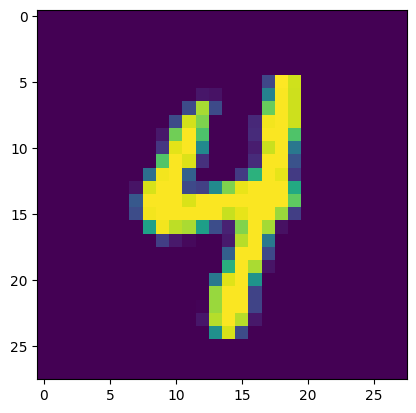

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
8


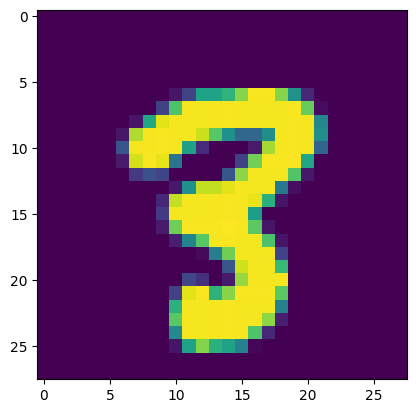

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
7


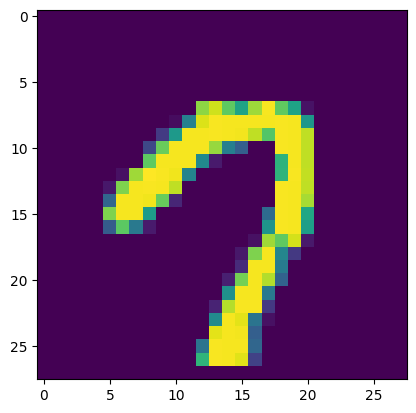

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1


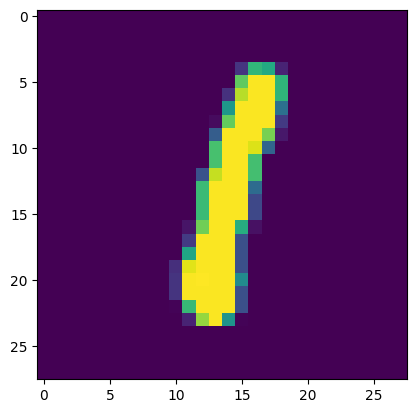

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3


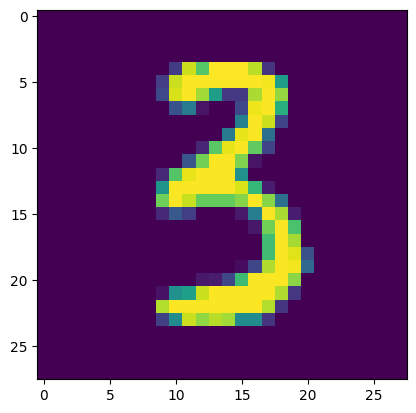

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
8


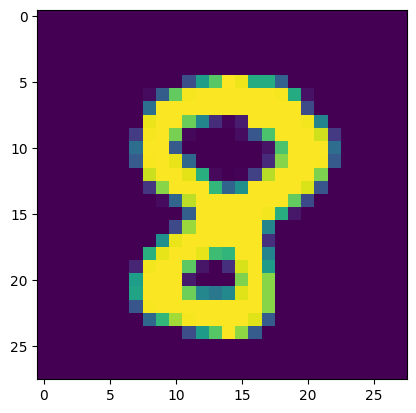

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
9


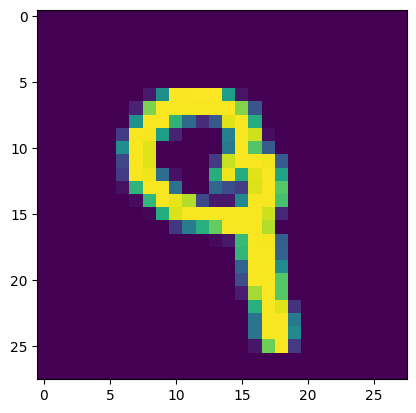

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5


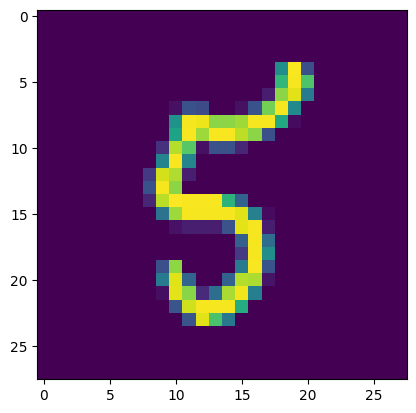

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6


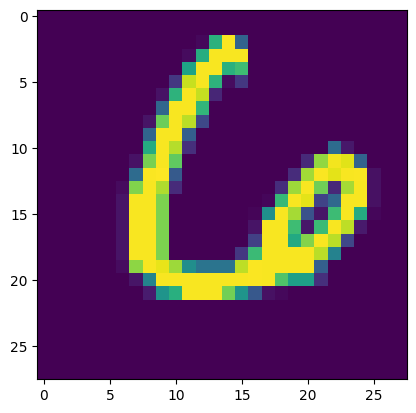

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
5


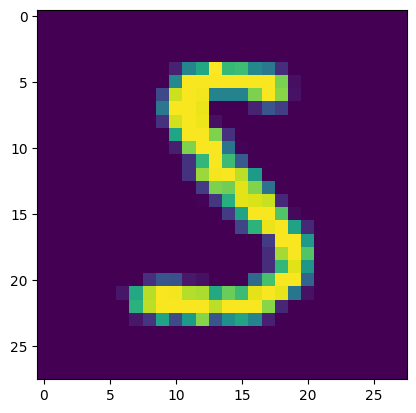

In [ ]:
for i in np.random.choice(np.arange(0,len(Ytest)), size = (10,) ):
  pred = model.predict(Xtest[np.newaxis,  i])
  predication = pred.argmax(axis=1)
  img  =  (Xtest[i]*255).reshape((28,28)).astype('uint8')
  print (predication[0])
  plt.imshow(img)
  plt.show()